# **Pairing Analysis**

## Projection on Pairing Channels

We start analysing the symmetry of the pairing with frequency and momentum for the different channels.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, display

from Pairing_Projection import Pairing_Projection, Pairing_Channel, Symmetric_Components, Get_Symmetry_Channel, Get_Total_Component
from MTI_Second_Order import FMTI2_NeumannBC, FMTI2_Relative_Coordinates, FMTI2_Wigner_Transform, Change_Basis

# labels for curves
Flabels = [["$f_{\\uparrow +, \\uparrow +}$", "$f_{\\uparrow +, \downarrow +}$", "$f_{\\uparrow +, \\uparrow -}$", "$f_{\\uparrow +, \downarrow -}$"],
          ["$f_{\downarrow +, \\uparrow +}$", "$f_{\downarrow +, \downarrow +}$", "$f_{\downarrow +, \\uparrow -}$", "$f_{\downarrow +, \downarrow -}$"],
          ["$f_{\\uparrow -, \\uparrow +}$", "$f_{\\uparrow -, \downarrow +}$", "$f_{\\uparrow -, \\uparrow -}$", "$f_{\\uparrow -, \downarrow -}$"],
          ["$f_{\downarrow -, \\uparrow +}$", "$f_{\downarrow -, \downarrow +}$", "$f_{\downarrow -, \\uparrow -}$", "$f_{\downarrow -, \downarrow -}$"]]

# colors for plotting
colors_real = ['brown', 'red', 'orange', 'gold']
# colors for plotting
colors_imag = ['blue','dodgerblue','lightskyblue','cyan']
# colors for plotting
colors_abs = ["#0077FF", "#00CC00", "#FFD700", "#FF2200"]

# labels for projection
label_sigma = {
    '11':   r"\ket{ \uparrow\uparrow }",
    '22':   r"\ket{ \downarrow\downarrow }",
    'sym':  r"\ket{\uparrow\downarrow} + \ket{\downarrow\uparrow}",
    'asym': r"\ket{\uparrow\downarrow} - \ket{\downarrow\uparrow}"
}

# labels for projection
label_lambda = {
    '11':   r"\ket{++}",
    '22':   r"\ket{--}",
    'sym':  r"\ket{+-} + \ket{-+}",
    'asym': r"\ket{+-} - \ket{-+}"
}

ratio_label = ['even $\omega$, even $k$',
              'even $\omega$, odd $k$',
              'odd $\omega$, even $k$',
              'odd $\omega$, odd $k$',]

### **Frequency and Momentum Symmetry**

We evaluate the symmetry of the pairing with respect to both frequency and momentum for a given selected channel in spin and orbital space.

In [ ]:
# parameters
d = 100.; mu = 0.010; Delta = 0.005; L = 0.0; omega = 0.; Z0 = 1.; k = 0.; kx = 0.; ky = 0.
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])


# compute symmetrized components of pairing
symm_pair = Symmetric_Components(d=d, Z0=Z0, k=k, kx=k, ky=k, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19)

# define spin and orbital channel
spin='asym'; orbital='asym'


symmetry = ['even frequency, even momentum',
           'even frequency, odd momentum',
           'odd frequency, even momentum',
           'odd frequency, odd momentum']
ratio = []
# loop over frequency symmetry
for freq in ['even','odd']:
    # loop over momentum symmetry
    for mom in ['even','odd']:
        
        # get total component for normalization
        f = Get_Total_Component(symm_pair, spin=spin, orbital=orbital)
        
        # get symmetry component
        f_sym = Get_Symmetry_Channel(symm_pair, frequency=freq, momentum=mom, spin=spin, orbital=orbital)

        # append to ratio array
        ratio.append(f_sym/f)

ratio = np.array(ratio)

# display the pairing channel
channel = rf"""
    \mathrm{{spin}}=\,{label_sigma[spin]}\,, 
    \quad
    \mathrm{{orbital}}={label_lambda[orbital]}
    """
display(Math(channel))

# print all symmetrized components for given channel 
for idx in range(4):
    print( symmetry[idx], ': ', round(abs(ratio[idx]),3) )

#### <font color='green'> **Zeeman Dependence** </font> 

In [ ]:
from tqdm.notebook import tqdm

# parameters
d=100.; mu = 0.010; Delta = 0.005; omega = 0.0025; Z0 = 1.; k = 0.001; kx = 0.; ky = 0.
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# define spin and orbital channel
spin='sym'; orbital='22'

# Zeeman values 
Zeeman = np.linspace(-0.050, 0.050, 30)

ratio = []

# loop over Zeeman
for idx in tqdm(range(len(Zeeman)), desc="Processing"):

    # Zeeman field
    L = Zeeman[idx]
    # ratio for each component
    r = []
    # normalization
    norm = 0.
    
    # compute symmetrized components of pairing
    symm_pair = Symmetric_Components(d=d, Z0=Z0, k=k, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19)
    
    # loop over frequency symmetry
    for freq in ['even','odd']:
        # loop over momentum symmetry
        for mom in ['even','odd']:
            
            # get total component for normalization
            f = Get_Total_Component(symm_pair, spin=spin, orbital=orbital)
            
            # get symmetry component
            f_sym = Get_Symmetry_Channel(symm_pair, frequency=freq, momentum=mom, spin=spin, orbital=orbital)

            # normalization factor
            norm += abs(f_sym)
            
            # append to ratio array
            r.append(abs(f_sym))

    r = np.array(r)/norm; r = np.append(r,abs(f))
    ratio.append(r)

ratio = np.array(ratio)
print(ratio.shape)

In [ ]:
# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))

for idx in range(4):
 
    ax.plot(Zeeman, ratio[:,idx], c=colors_abs[idx], label=ratio_label[idx], lw=4)


ax.set_ylabel("$f_{even,odd}$", fontsize = 14)
ax.set_xlabel("Zeeman $\Lambda$ [meV]", fontsize = 14)
ax.legend(fontsize=14);

### <font color='black'> **Average over Orbital** </font> 

Below, we evaluate the symmetÇrized components averaging over all the orbital parts.

#### <font color='green'> **Zeeman Dependence** </font> 

In [ ]:
# parameters
d=100.; mu = 0.010; Delta = 0.005; omega = 0.0025; Z0 = 1.; k = 0.001; kx = 0.; ky = 0.
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# define spin and orbital channel
spin='asym'

# Zeeman values 
Zeeman = np.linspace(-0.050, 0.050, 30)

ratio_avg = []

# loop over Zeeman
for idx in tqdm(range(len(Zeeman)), desc="Processing"):

    # Zeeman field
    L = Zeeman[idx]
    # ratio for each component
    r = []
    # normalization
    norm = 0.
    
    # compute symmetrized components of pairing
    symm_pair = Symmetric_Components(d=d, Z0=Z0, k=k, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19)
    
    # loop over frequency symmetry
    for freq in ['even','odd']:
        # loop over momentum symmetry
        for mom in ['even','odd']:

            # sum over orbitals
            fsym = 0.
            
            # loop over orbitals
            for orbital in ['asym', 'sym', '11', '22']:
                
                # sum orbital components
                f_sym += Get_Symmetry_Channel(symm_pair, frequency=freq, momentum=mom, spin=spin, orbital=orbital)

            # append to ratio array
            r.append(abs(f_sym))
            
            # normalization factor
            norm += abs(f_sym)

    r = np.array(r)/norm
    ratio_avg.append(r)

ratio_avg = np.array(ratio_avg)
print(ratio_avg.shape)

In [ ]:
# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))

for idx in range(4):

    ax.plot(Zeeman, ratio_avg[:,idx], c=colors_abs[idx], label=ratio_label[idx], lw=4)

#ax.plot(Zeeman, [np.sum(ratio_avg[jdx,:]) for jdx in range(len(Zeeman))], c='black', lw=2)

ax.set_ylabel("$f_{avg}$", fontsize = 14)
ax.set_xlabel("Zeeman $\Lambda$ [meV]", fontsize = 14)
ax.set_title("spin = " + spin, fontsize=14)
ax.legend(fontsize=14);

## Frobenius Norm

To quantify the general amount of even or odd components in the pairing matrix, we use the Frobenius norm defined as
$$
    \| \mathcal{F} \| = \sqrt{ \sum_{ij} |f_{ij}|^2 } \,.
$$
We compute the norm in the following spaces:

- **Spin space** \
  We quantify the ratio of spin singlet and triplet in the pairing matrix separating the components that are symmetric and antisymmetric upon exchange of the spin variables 
  $$
      \{ \mathcal{F}_{singlet} \}_{\sigma\sigma'} = \frac12 
      \bigl\lbrack \mathcal{F}_{\sigma\sigma'} - \mathcal{F}_{\sigma'\sigma} \bigr\rbrack \,,
      \qquad
      \{ \mathcal{F}_{triplet} \}_{\sigma\sigma'} = \frac12 
      \bigl\lbrack \mathcal{F}_{\sigma\sigma'} + \mathcal{F}_{\sigma'\sigma} \bigr\rbrack \,.
  $$
  The singlet/triplet pairing can then be quantified as
  $$
      N_s = \| \mathcal{F}_{singlet} \| \,,
      \qquad
      N_t = \| \mathcal{F}_{triplet} \| \,.
  $$

- **Momentum space** \
  Separating the components that are even or odd upon inversion of momentum $\mathbf{k} \rightarrow \mathbf{-k}$
  $$
      \mathcal{F}_{odd}(\mathbf{k}) = \frac12 
      \bigl\lbrack \mathcal{F}(\mathbf{k}) - \mathcal{F}(\mathbf{-k}) \bigr\rbrack \,,
      \qquad
      \mathcal{F}_{even}(\mathbf{k}) = \frac12 
      \bigl\lbrack \mathcal{F}(\mathbf{k}) + \mathcal{F}(\mathbf{-k}) \bigr\rbrack \,,
  $$
  we can quantify the ratio of even/odd parity pairing corresponding to $s,d$-wave ($p,f$-wave) as
  $$
      N_{even} = \| \mathcal{F}_{even} \| \,,
      \qquad
      N_{odd} = \| \mathcal{F}_{odd} \| \,.
  $$

- **Frequency space** \
  Separating the components that are even or odd upon inversion of frequency $\omega \rightarrow -\omega$
  $$
      \mathcal{F}_{odd}(\omega) = \frac12 
      \bigl\lbrack \mathcal{F}(\omega) - \mathcal{F}(-\omega) \bigr\rbrack \,,
      \qquad
      \mathcal{F}_{even}(\omega) = \frac12 
      \bigl\lbrack \mathcal{F}(\omega) + \mathcal{F}(-\omega) \bigr\rbrack \,.
  $$
  we can quantify the ratio of even/odd frequency pairing as
  $$
      N_{even} = \| \mathcal{F}_{even} \| \,,
      \qquad
      N_{odd} = \| \mathcal{F}_{odd} \| \,.
  $$

#### <font color='green'> **Spin Symmetry** </font> 

In [6]:
from Pairing_Projection import Spin_Symmetry

# parameters
d=100.; mu = 0.010; Delta = 0.005; omega = 0.0025; k = 0.005; kx = 0.005; ky = 0.005
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# Zeeman values 
Zeeman = np.linspace(-0.100, 0.100, 100)

Ns = []; Nt = []

# center of mass positions
CM = [0., 5., 10.]
# loop over values of Z0
for Z0 in CM:
           
    # evaluate singlet/triplet components
    spin = np.array([Spin_Symmetry(d=d, Z0=Z0, k=k, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19) for L in Zeeman])
    # get singlet part
    Ns.append( np.divide( spin[:,0], spin[:,0]+spin[:,1] ) )
    # get triplet part
    Nt.append( np.divide( spin[:,1], spin[:,0]+spin[:,1] ) )

Ns = np.array(Ns)
Nt = np.array(Nt)

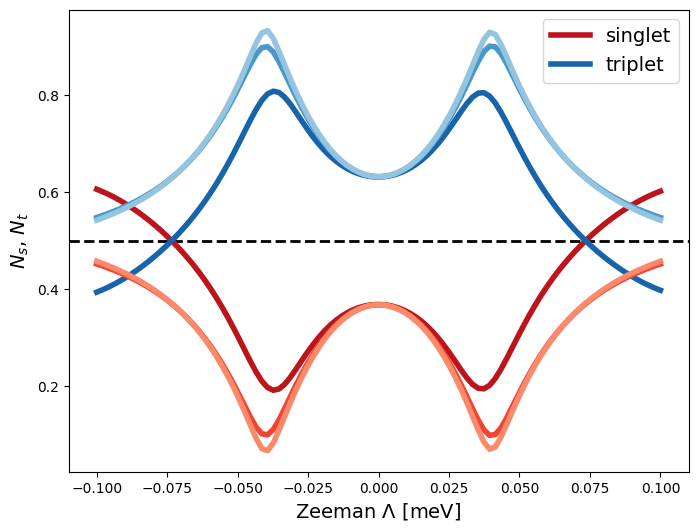

In [9]:
from matplotlib.pyplot import cm

# colors
n = 6; cmap_s = plt.get_cmap('Reds_r', n); cmap_t = plt.get_cmap('Blues_r', n)

# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))
# plot horizontal line at 0.5
ax.axhline(y=0.5, c='black', ls='--', lw=2)

for idx in range(len(CM)):

    if idx == 0: 
        ax.plot(Zeeman, Ns[idx], c=cmap_s(idx+1), lw=4, label='singlet')
        ax.plot(Zeeman, Nt[idx], c=cmap_t(idx+1), lw=4, label='triplet')
    else:
        ax.plot(Zeeman, Ns[idx], c=cmap_s(idx+1), lw=4)
        ax.plot(Zeeman, Nt[idx], c=cmap_t(idx+1), lw=4)

ax.set_ylabel("$N_s$, $N_t$", fontsize = 14)
ax.set_xlabel("Zeeman $\Lambda$ [meV]", fontsize = 14);
ax.legend(fontsize=14);

#### <font color='green'> **Momentum Symmetry** </font> 

In [22]:
from Pairing_Projection import Momentum_Symmetry

# parameters
d=100.; mu = 0.010; Delta = 0.005; omega = 0.0025; k = 0.005; kx = 0.005; ky = 0.005
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# Zeeman values 
Zeeman = np.linspace(-0.100, 0.100, 100)

N_even = []; N_odd = []

# center of mass positions
CM = [0., 5., 10.]
# loop over values of Z0
for Z0 in CM:
           
    # evaluate singlet/triplet components
    parity = np.array([Momentum_Symmetry(d=d, Z0=Z0, k=k, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19) for L in Zeeman])
    # get singlet part
    N_even.append( np.divide( parity[:,0], parity[:,0]+parity[:,1] ) )
    # get triplet part
    N_odd.append( np.divide( parity[:,1], parity[:,0]+parity[:,1] ) )

N_even = np.array(N_even)
N_odd = np.array(N_odd)

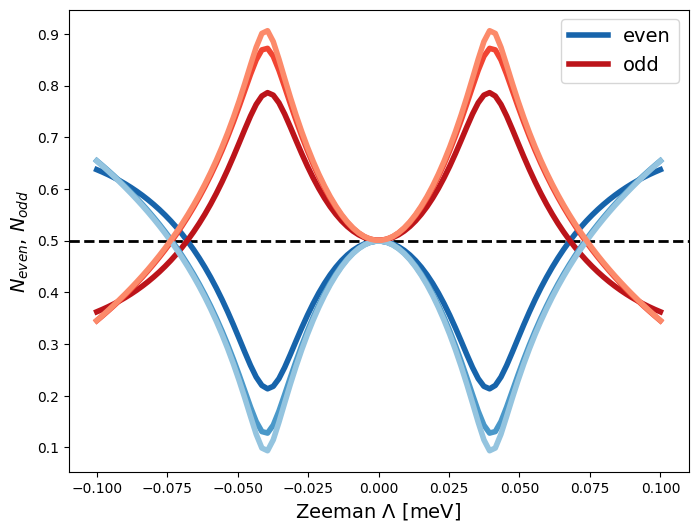

In [23]:
from matplotlib.pyplot import cm

# colors
n = 6; cmap_o = plt.get_cmap('Reds_r', n); cmap_e = plt.get_cmap('Blues_r', n)

# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))
# plot horizontal line at 0.5
ax.axhline(y=0.5, c='black', ls='--', lw=2)

for idx in range(len(CM)):

    if idx == 0: 
        ax.plot(Zeeman, N_even[idx], c=cmap_e(idx+1), lw=4, label='even')
        ax.plot(Zeeman, N_odd[idx], c=cmap_o(idx+1), lw=4, label='odd')
    else:
        ax.plot(Zeeman, N_even[idx], c=cmap_e(idx+1), lw=4)
        ax.plot(Zeeman, N_odd[idx], c=cmap_o(idx+1), lw=4)


ax.set_ylabel("$N_{even}$, $N_{odd}$", fontsize = 14)
ax.set_xlabel("Zeeman $\Lambda$ [meV]", fontsize = 14);
ax.legend(fontsize=14);

#### <font color='green'> **Frequency Symmetry** </font> 

In [4]:
from Pairing_Projection import Frequency_Symmetry

# parameters
d=100.; mu = 0.010; Delta = 0.005; omega = 0.0025; k = 0.005; kx = 0.005; ky = 0.005
# coupling matrices
Gamma = np.matrix([[1,0],[0,1],[1,0],[0,1]])

# Zeeman values 
Zeeman = np.linspace(-0.100, 0.100, 100)

N_even_w = []; N_odd_w = []

# center of mass positions
CM = [0., 5., 10.]
# loop over values of Z0
for Z0 in CM:
           
    # evaluate singlet/triplet components
    frequency = np.array([Frequency_Symmetry(d=d, Z0=Z0, k=k, kx=kx, ky=ky, L=L, mu=mu, Delta=Delta, omega=omega, Gamma=Gamma, N=19) for L in Zeeman])
    # get singlet part
    N_even_w.append( np.divide( frequency[:,0], frequency[:,0]+frequency[:,1] ) )
    # get triplet part
    N_odd_w.append( np.divide( frequency[:,1], frequency[:,0]+frequency[:,1] ) )

N_even_w = np.array(N_even_w)
N_odd_w = np.array(N_odd_w)

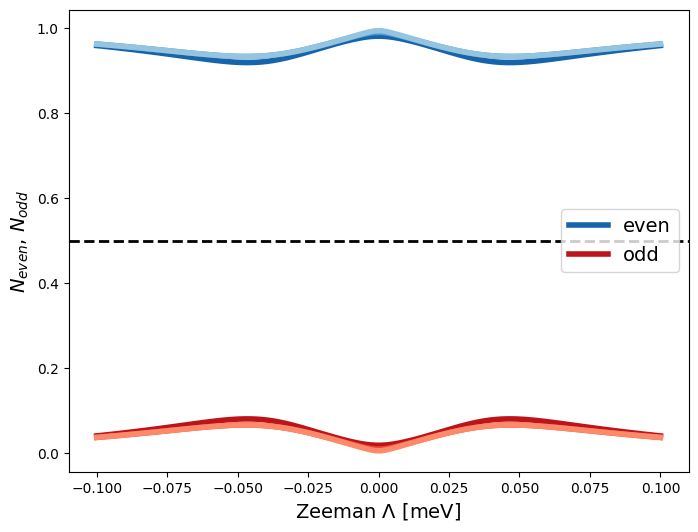

In [5]:
from matplotlib.pyplot import cm

# colors
n = 6; cmap_o = plt.get_cmap('Reds_r', n); cmap_e = plt.get_cmap('Blues_r', n)

# figure
fig, ax = plt.subplots(1,1, figsize=(8,6))
# plot horizontal line at 0.5
ax.axhline(y=0.5, c='black', ls='--', lw=2)

for idx in range(len(CM)):

    if idx == 0: 
        ax.plot(Zeeman, N_even_w[idx], c=cmap_e(idx+1), lw=4, label='even')
        ax.plot(Zeeman, N_odd_w[idx], c=cmap_o(idx+1), lw=4, label='odd')
    else:
        ax.plot(Zeeman, N_even_w[idx], c=cmap_e(idx+1), lw=4)
        ax.plot(Zeeman, N_odd_w[idx], c=cmap_o(idx+1), lw=4)


ax.set_ylabel("$N_{even}$, $N_{odd}$", fontsize = 14)
ax.set_xlabel("Zeeman $\Lambda$ [meV]", fontsize = 14);
ax.legend(fontsize=14);